In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Create a set of random longitude and latitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.00, high = 180.00, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
#Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=411052a4625684b086d27e306d6abdd8


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | meulaboh
Processing Record 4 of Set 1 | havoysund
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | minab
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | lere
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | dashitou
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | verkh-usugli
Processing Record 17 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | mushie
Processing Record 20 of Set 1 | dinsor
City not found. Skipping...
Processing Record 21 of Set 1 | sahrak
City not found. Skippin

Processing Record 39 of Set 4 | umm kaddadah
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | san cristobal
Processing Record 42 of Set 4 | alcantara
Processing Record 43 of Set 4 | ifakara
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | las palmas
Processing Record 46 of Set 4 | rupert
Processing Record 47 of Set 4 | marataizes
Processing Record 48 of Set 4 | san francisco
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | naron
Processing Record 2 of Set 5 | mantenopolis
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | skegness
Processing Record 5 of Set 5 | getulio vargas
Processing Record 6 of Set 5 | abu jubayhah
City not found. Skipping...
Processing Record 7 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 5 | fethiye
Processing Record 9 of Set 5 | paita
Processing Record 10 of Set 5 | hamilton
Processing Record 11 of S

Processing Record 29 of Set 8 | cabedelo
Processing Record 30 of Set 8 | hellvik
Processing Record 31 of Set 8 | mana
Processing Record 32 of Set 8 | mirnyy
Processing Record 33 of Set 8 | beni mazar
Processing Record 34 of Set 8 | huntington
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | nova olinda do norte
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | santa cruz
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | pushchino
Processing Record 42 of Set 8 | khorixas
Processing Record 43 of Set 8 | ekibastuz
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | abu dhabi
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | labuan
Processing Record 48 of Set 8 | araouane
Processing Record 49 of Set 8 | suleja
Processing Record 50 of Set 8 | piploda
Processing Record 1 of Set 9 | armidale
Processing Record 2 of Set 9 | leb

Processing Record 18 of Set 12 | erenhot
Processing Record 19 of Set 12 | gallup
Processing Record 20 of Set 12 | moengo
Processing Record 21 of Set 12 | asosa
Processing Record 22 of Set 12 | camenca
Processing Record 23 of Set 12 | bintulu
Processing Record 24 of Set 12 | kuito
Processing Record 25 of Set 12 | karwar
Processing Record 26 of Set 12 | vengerovo
Processing Record 27 of Set 12 | ehingen
Processing Record 28 of Set 12 | obo
Processing Record 29 of Set 12 | astana
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
len(city_data)

537

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,57.47,72,55,4.94,NZ,2021-07-29 01:29:20
1,Arraial Do Cabo,-22.9661,-42.0278,64.47,86,100,19.01,BR,2021-07-29 01:26:56
2,Meulaboh,4.1363,96.1285,76.89,87,100,3.91,ID,2021-07-29 01:25:50
3,Havoysund,70.9963,24.6622,47.28,90,93,7.74,NO,2021-07-29 01:29:20
4,Hobart,-42.8794,147.3294,52.27,65,40,5.99,AU,2021-07-29 01:26:47
5,Busselton,-33.6500,115.3333,59.09,76,40,25.50,AU,2021-07-29 01:27:38
6,Minab,27.1467,57.0801,90.90,40,92,3.33,IR,2021-07-29 01:29:21
7,Ushuaia,-54.8000,-68.3000,42.46,81,20,4.61,AR,2021-07-29 01:25:02
8,Rikitea,-23.1203,-134.9692,73.81,79,96,14.45,PF,2021-07-29 01:29:21
9,Lere,10.3870,8.5726,68.32,96,99,3.51,NG,2021-07-29 01:29:22


In [14]:
new_column_order =["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-07-29 01:29:20,-46.1927,168.8643,57.47,72,55,4.94
1,Arraial Do Cabo,BR,2021-07-29 01:26:56,-22.9661,-42.0278,64.47,86,100,19.01
2,Meulaboh,ID,2021-07-29 01:25:50,4.1363,96.1285,76.89,87,100,3.91
3,Havoysund,NO,2021-07-29 01:29:20,70.9963,24.6622,47.28,90,93,7.74
4,Hobart,AU,2021-07-29 01:26:47,-42.8794,147.3294,52.27,65,40,5.99
...,...,...,...,...,...,...,...,...,...
532,Karwar,IN,2021-07-29 01:31:55,14.8000,74.1333,78.76,83,100,14.09
533,Vengerovo,RU,2021-07-29 01:31:55,55.6848,76.7471,58.78,84,81,11.21
534,Ehingen,DE,2021-07-29 01:31:56,48.2826,9.7275,60.89,92,73,3.85
535,Obo,CF,2021-07-29 01:31:56,5.3998,26.4869,64.62,94,99,1.90


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

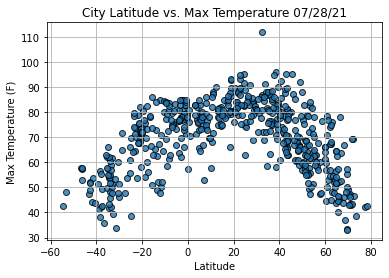

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

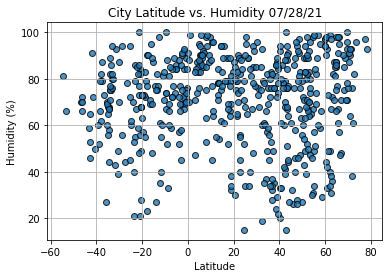

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

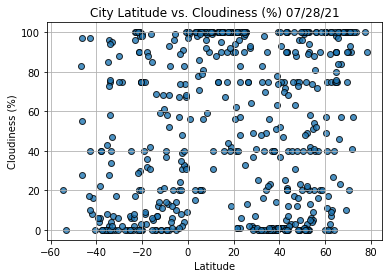

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

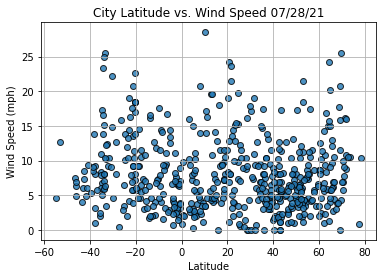

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Meulaboh,ID,2021-07-29 01:25:50,4.1363,96.1285,76.89,87,100,3.91
3,Havoysund,NO,2021-07-29 01:29:20,70.9963,24.6622,47.28,90,93,7.74
6,Minab,IR,2021-07-29 01:29:21,27.1467,57.0801,90.90,40,92,3.33
9,Lere,NG,2021-07-29 01:29:22,10.3870,8.5726,68.32,96,99,3.51
10,Albany,US,2021-07-29 01:29:22,42.6001,-73.9662,68.72,79,25,2.26
...,...,...,...,...,...,...,...,...,...
532,Karwar,IN,2021-07-29 01:31:55,14.8000,74.1333,78.76,83,100,14.09
533,Vengerovo,RU,2021-07-29 01:31:55,55.6848,76.7471,58.78,84,81,11.21
534,Ehingen,DE,2021-07-29 01:31:56,48.2826,9.7275,60.89,92,73,3.85
535,Obo,CF,2021-07-29 01:31:56,5.3998,26.4869,64.62,94,99,1.90


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Meulaboh,ID,2021-07-29 01:25:50,4.1363,96.1285,76.89,87,100,3.91
3,Havoysund,NO,2021-07-29 01:29:20,70.9963,24.6622,47.28,90,93,7.74
6,Minab,IR,2021-07-29 01:29:21,27.1467,57.0801,90.90,40,92,3.33
9,Lere,NG,2021-07-29 01:29:22,10.3870,8.5726,68.32,96,99,3.51
10,Albany,US,2021-07-29 01:29:22,42.6001,-73.9662,68.72,79,25,2.26


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

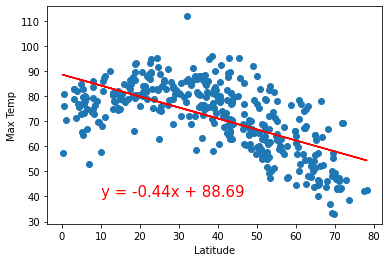

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

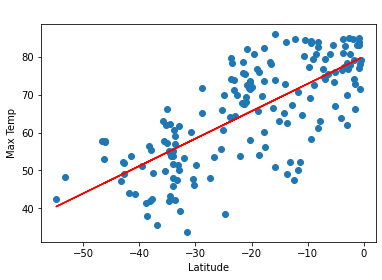

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

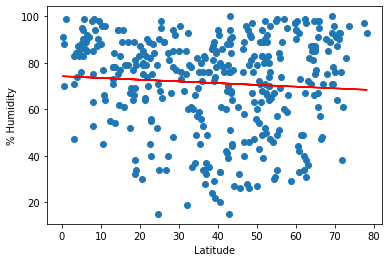

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

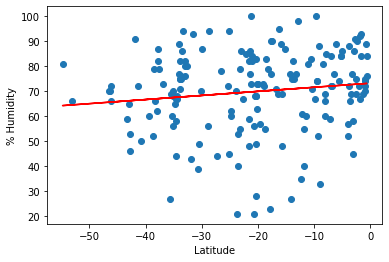

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

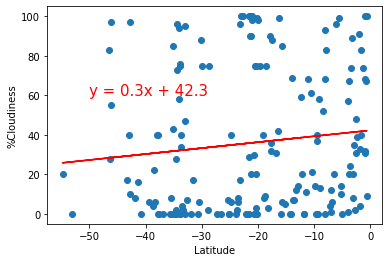

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Cloudiness', '%Cloudiness',(-50,60))

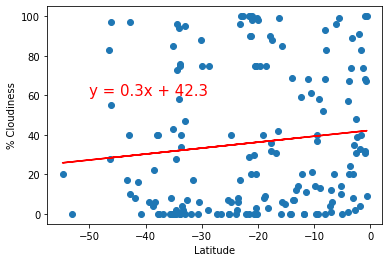

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

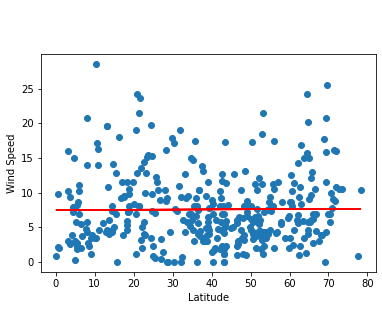

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

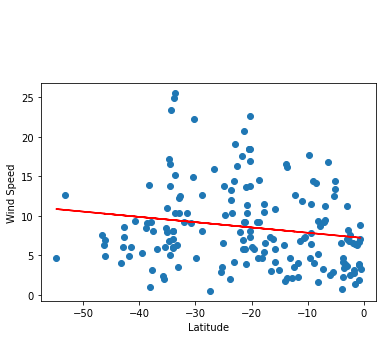

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))